<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


Dataset taken from [Kaggle](https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction).

In [4]:
data = pd.read_csv('data/Energy_consumption.csv')
data.head(15)

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0   2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1   2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2   2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3   2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4   2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
5   2022-01-01 05:00:00    29.576037  36.824263    1871.709180          6   
6   2022-01-01 06:00:00    25.131167  35.709622    1607.001228          6   
7   2022-01-01 07:00:00    23.182844  31.679920    1633.955330          8   
8   2022-01-01 08:00:00    25.391999  46.399364    1240.309224          6   
9   2022-01-01 09:00:00    22.212549  32.418464    1705.420336          1   
10  2022-01-01 10:00:00    28.064814  36.451472    1341.467129          2   
11  2022-01-01 11:00:00    23.422546  30.527342    1604.418355          6   
12  2022-01-01 12:00:00    25.388888  47.601018    1244.618914          1   
13  2022-01-01 13:00:00    20.058738  41.861642    1806.052632          2   
14  2022-01-01 14:00:00    26.731525  37.297870    1419.749014          6   

   HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0         On           Off         2.774699     Monday      No   
1         On            On        21.831384   Saturday      No   
2        Off           Off         6.764672     Sunday      No   
3        Off            On         8.623447  Wednesday      No   
4         On           Off         3.071969     Friday      No   
5        Off           Off        17.626690     Sunday     Yes   
6         On           Off        24.264702     Friday     Yes   
7        Off           Off        27.517099   Thursday     Yes   
8         On           Off         2.307595     Sunday      No   
9         On           Off        29.140071    Tuesday      No   
10       Off           Off         0.352238     Monday     Yes   
11        On            On        19.529548   Thursday     Yes   
12        On           Off        21.797444    Tuesday     Yes   
13       Off           Off         6.384949     Friday     Yes   
14       Off           Off        12.074223     Friday     Yes   

    EnergyConsumption  
0           75.364373  
1           83.401855  
2           78.270888  
3           56.519850  
4           70.811732  
5           84.321885  
6           76.165791  
7           74.131906  
8           78.206236  
9           77.992214  
10          82.274434  
11          73.278670  
12          84.144776  
13          60.022519  
14          81.183188

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


This dataset encapsulates a diverse array of features, including temperature, humidity, occupancy, HVAC and lighting usage, renewable energy contributions, and more. Each timestamp provides a snapshot of a hypothetical environment, allowing for in-depth analysis and modeling of energy consumption behaviors. Dive into the nuances of this synthetic dataset, designed to emulate real-world scenarios, and unravel the complexities that influence energy usage. Whether you are delving into predictive modeling or honing your data analysis skills, this dataset offers a dynamic playground for experimentation and discovery.

In [5]:
data.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [6]:
sum(data.duplicated())

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [8]:
pd.DataFrame(data.isnull().value_counts()).T

Timestamp         False
Temperature       False
Humidity          False
SquareFootage     False
Occupancy         False
HVACUsage         False
LightingUsage     False
RenewableEnergy   False
DayOfWeek         False
Holiday           False
EnergyConsumption False
count              1000

In [9]:
data.describe().T

count         mean         std          min          25%  \
Temperature        1000.0    24.982026    2.836850    20.007565    22.645070   
Humidity           1000.0    45.395412    8.518905    30.015975    38.297722   
SquareFootage      1000.0  1500.052488  288.418873  1000.512661  1247.108548   
Occupancy          1000.0     4.581000    2.865598     0.000000     2.000000   
RenewableEnergy    1000.0    15.132813    8.745917     0.006642     7.628385   
EnergyConsumption  1000.0    77.055873    8.144112    53.263278    71.544690   

                           50%          75%          max  
Temperature          24.751637    27.418174    29.998671  
Humidity             45.972116    52.420066    59.969085  
SquareFootage      1507.967426  1740.340165  1999.982252  
Occupancy             5.000000     7.000000     9.000000  
RenewableEnergy      15.072296    22.884064    29.965327  
EnergyConsumption    76.943696    82.921742    99.201120

In [10]:
feature_cols = data.select_dtypes(include=object)
for col in feature_cols.columns:
    print(col,':',data[col].unique(),'\n')

Timestamp : ['2022-01-01 00:00:00' '2022-01-01 01:00:00' '2022-01-01 02:00:00'
 '2022-01-01 03:00:00' '2022-01-01 04:00:00' '2022-01-01 05:00:00'
 '2022-01-01 06:00:00' '2022-01-01 07:00:00' '2022-01-01 08:00:00'
 '2022-01-01 09:00:00' '2022-01-01 10:00:00' '2022-01-01 11:00:00'
 '2022-01-01 12:00:00' '2022-01-01 13:00:00' '2022-01-01 14:00:00'
 '2022-01-01 15:00:00' '2022-01-01 16:00:00' '2022-01-01 17:00:00'
 '2022-01-01 18:00:00' '2022-01-01 19:00:00' '2022-01-01 20:00:00'
 '2022-01-01 21:00:00' '2022-01-01 22:00:00' '2022-01-01 23:00:00'
 '2022-01-02 00:00:00' '2022-01-02 01:00:00' '2022-01-02 02:00:00'
 '2022-01-02 03:00:00' '2022-01-02 04:00:00' '2022-01-02 05:00:00'
 '2022-01-02 06:00:00' '2022-01-02 07:00:00' '2022-01-02 08:00:00'
 '2022-01-02 09:00:00' '2022-01-02 10:00:00' '2022-01-02 11:00:00'
 '2022-01-02 12:00:00' '2022-01-02 13:00:00' '2022-01-02 14:00:00'
 '2022-01-02 15:00:00' '2022-01-02 16:00:00' '2022-01-02 17:00:00'
 '2022-01-02 18:00:00' '2022-01-02 19:00:00' '2022

# 2. Objectives


In [11]:
df = data.copy()
df

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0          On           Off         2.774699     Monday      No   
1          On            On        21.831384   Saturday      No   
2         Off           Off         6.764672     Sunday      No   
3         Off            On         8.623447  Wednesday      No   
4          On           Off         3.071969     Friday      No   
..        ...           ...              ...        ...     ...   
995       Off           Off        21.194696   Saturday      No   
996       Off            On        25.748176    Tuesday     Yes   
997       Off            On         0.297079     Friday     Yes   
998        On           Off        20.425163   Thursday     Yes   
999       Off            On         2.455657   Saturday      No   

     EnergyConsumption  
0            75.364373  
1            83.401855  
2            78.270888  
3            56.519850  
4            70.811732  
..                 ...  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311  

[1000 rows x 11 columns]

We will now encode our categorical data.

In [12]:
df.replace({'On':1, 'Off':0, 'Yes':1, 'No':0,
            'Monday':1, 'Saturday':6, 'Sunday':7, 'Wednesday':3, 'Friday':5, 'Thursday':4, 'Tuesday':2},inplace=True)
df

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

     HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
0            1              0         2.774699          1        0   
1            1              1        21.831384          6        0   
2            0              0         6.764672          7        0   
3            0              1         8.623447          3        0   
4            1              0         3.071969          5        0   
..         ...            ...              ...        ...      ...   
995          0              0        21.194696          6        0   
996          0              1        25.748176          2        1   
997          0              1         0.297079          5        1   
998          1              0        20.425163          4        1   
999          0              1         2.455657          6        0   

     EnergyConsumption  
0            75.364373  
1            83.401855  
2            78.270888  
3            56.519850  
4            70.811732  
..                 ...  
995          82.306692  
996          66.577320  
997          72.753471  
998          76.950389  
999          71.545311  

[1000 rows x 11 columns]

In [13]:
df['Timestamp_unix'] = pd.to_datetime(df['Timestamp']).astype('int64')/10**9
df

Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

     HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek  Holiday  \
0            1              0         2.774699          1        0   
1            1              1        21.831384          6        0   
2            0              0         6.764672          7        0   
3            0              1         8.623447          3        0   
4            1              0         3.071969          5        0   
..         ...            ...              ...        ...      ...   
995          0              0        21.194696          6        0   
996          0              1        25.748176          2        1   
997          0              1         0.297079          5        1   
998          1              0        20.425163          4        1   
999          0              1         2.455657          6        0   

     EnergyConsumption  Timestamp_unix  
0            75.364373    1.640995e+09  
1            83.401855    1.640999e+09  
2            78.270888    1.641002e+09  
3            56.519850    1.641006e+09  
4            70.811732    1.641010e+09  
..                 ...             ...  
995          82.306692    1.644577e+09  
996          66.577320    1.644581e+09  
997          72.753471    1.644584e+09  
998          76.950389    1.644588e+09  
999          71.545311    1.644592e+09  

[1000 rows x 12 columns]

In [14]:
df = df.drop(columns='Timestamp')
df

Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  \
0      25.139433  43.431581    1565.693999          5          1   
1      27.731651  54.225919    1411.064918          1          1   
2      28.704277  58.907658    1755.715009          2          0   
3      20.080469  50.371637    1452.316318          1          0   
4      23.097359  51.401421    1094.130359          9          1   
..           ...        ...            ...        ...        ...   
995    28.619382  48.850160    1080.087000          5          0   
996    23.836647  47.256435    1705.235156          4          0   
997    23.005340  48.720501    1320.285281          6          0   
998    25.138365  31.306459    1309.079719          3          1   
999    23.051165  42.615421    1018.140606          6          0   

     LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  \
0                0         2.774699          1        0          75.364373   
1                1        21.831384          6        0          83.401855   
2                0         6.764672          7        0          78.270888   
3                1         8.623447          3        0          56.519850   
4                0         3.071969          5        0          70.811732   
..             ...              ...        ...      ...                ...   
995              0        21.194696          6        0          82.306692   
996              1        25.748176          2        1          66.577320   
997              1         0.297079          5        1          72.753471   
998              0        20.425163          4        1          76.950389   
999              1         2.455657          6        0          71.545311   

     Timestamp_unix  
0      1.640995e+09  
1      1.640999e+09  
2      1.641002e+09  
3      1.641006e+09  
4      1.641010e+09  
..              ...  
995    1.644577e+09  
996    1.644581e+09  
997    1.644584e+09  
998    1.644588e+09  
999    1.644592e+09  

[1000 rows x 11 columns]

In [15]:
df.EnergyConsumption.skew()

0.027398907453860765

<Axes: >

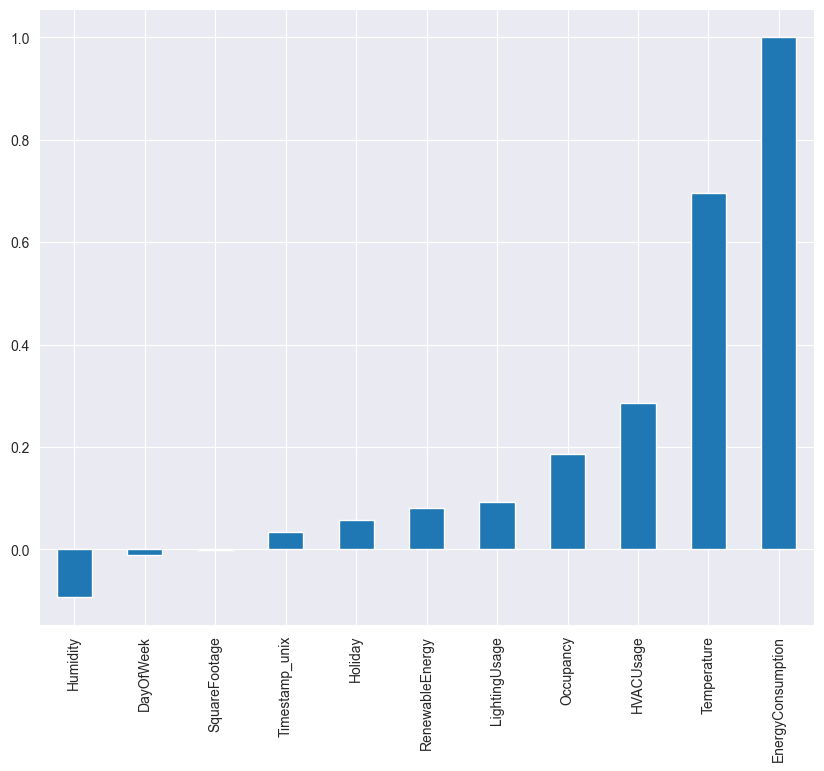

In [16]:
corelations = df.corr()['EnergyConsumption'].sort_values()
corelations.plot(kind='bar', figsize=(10,8))

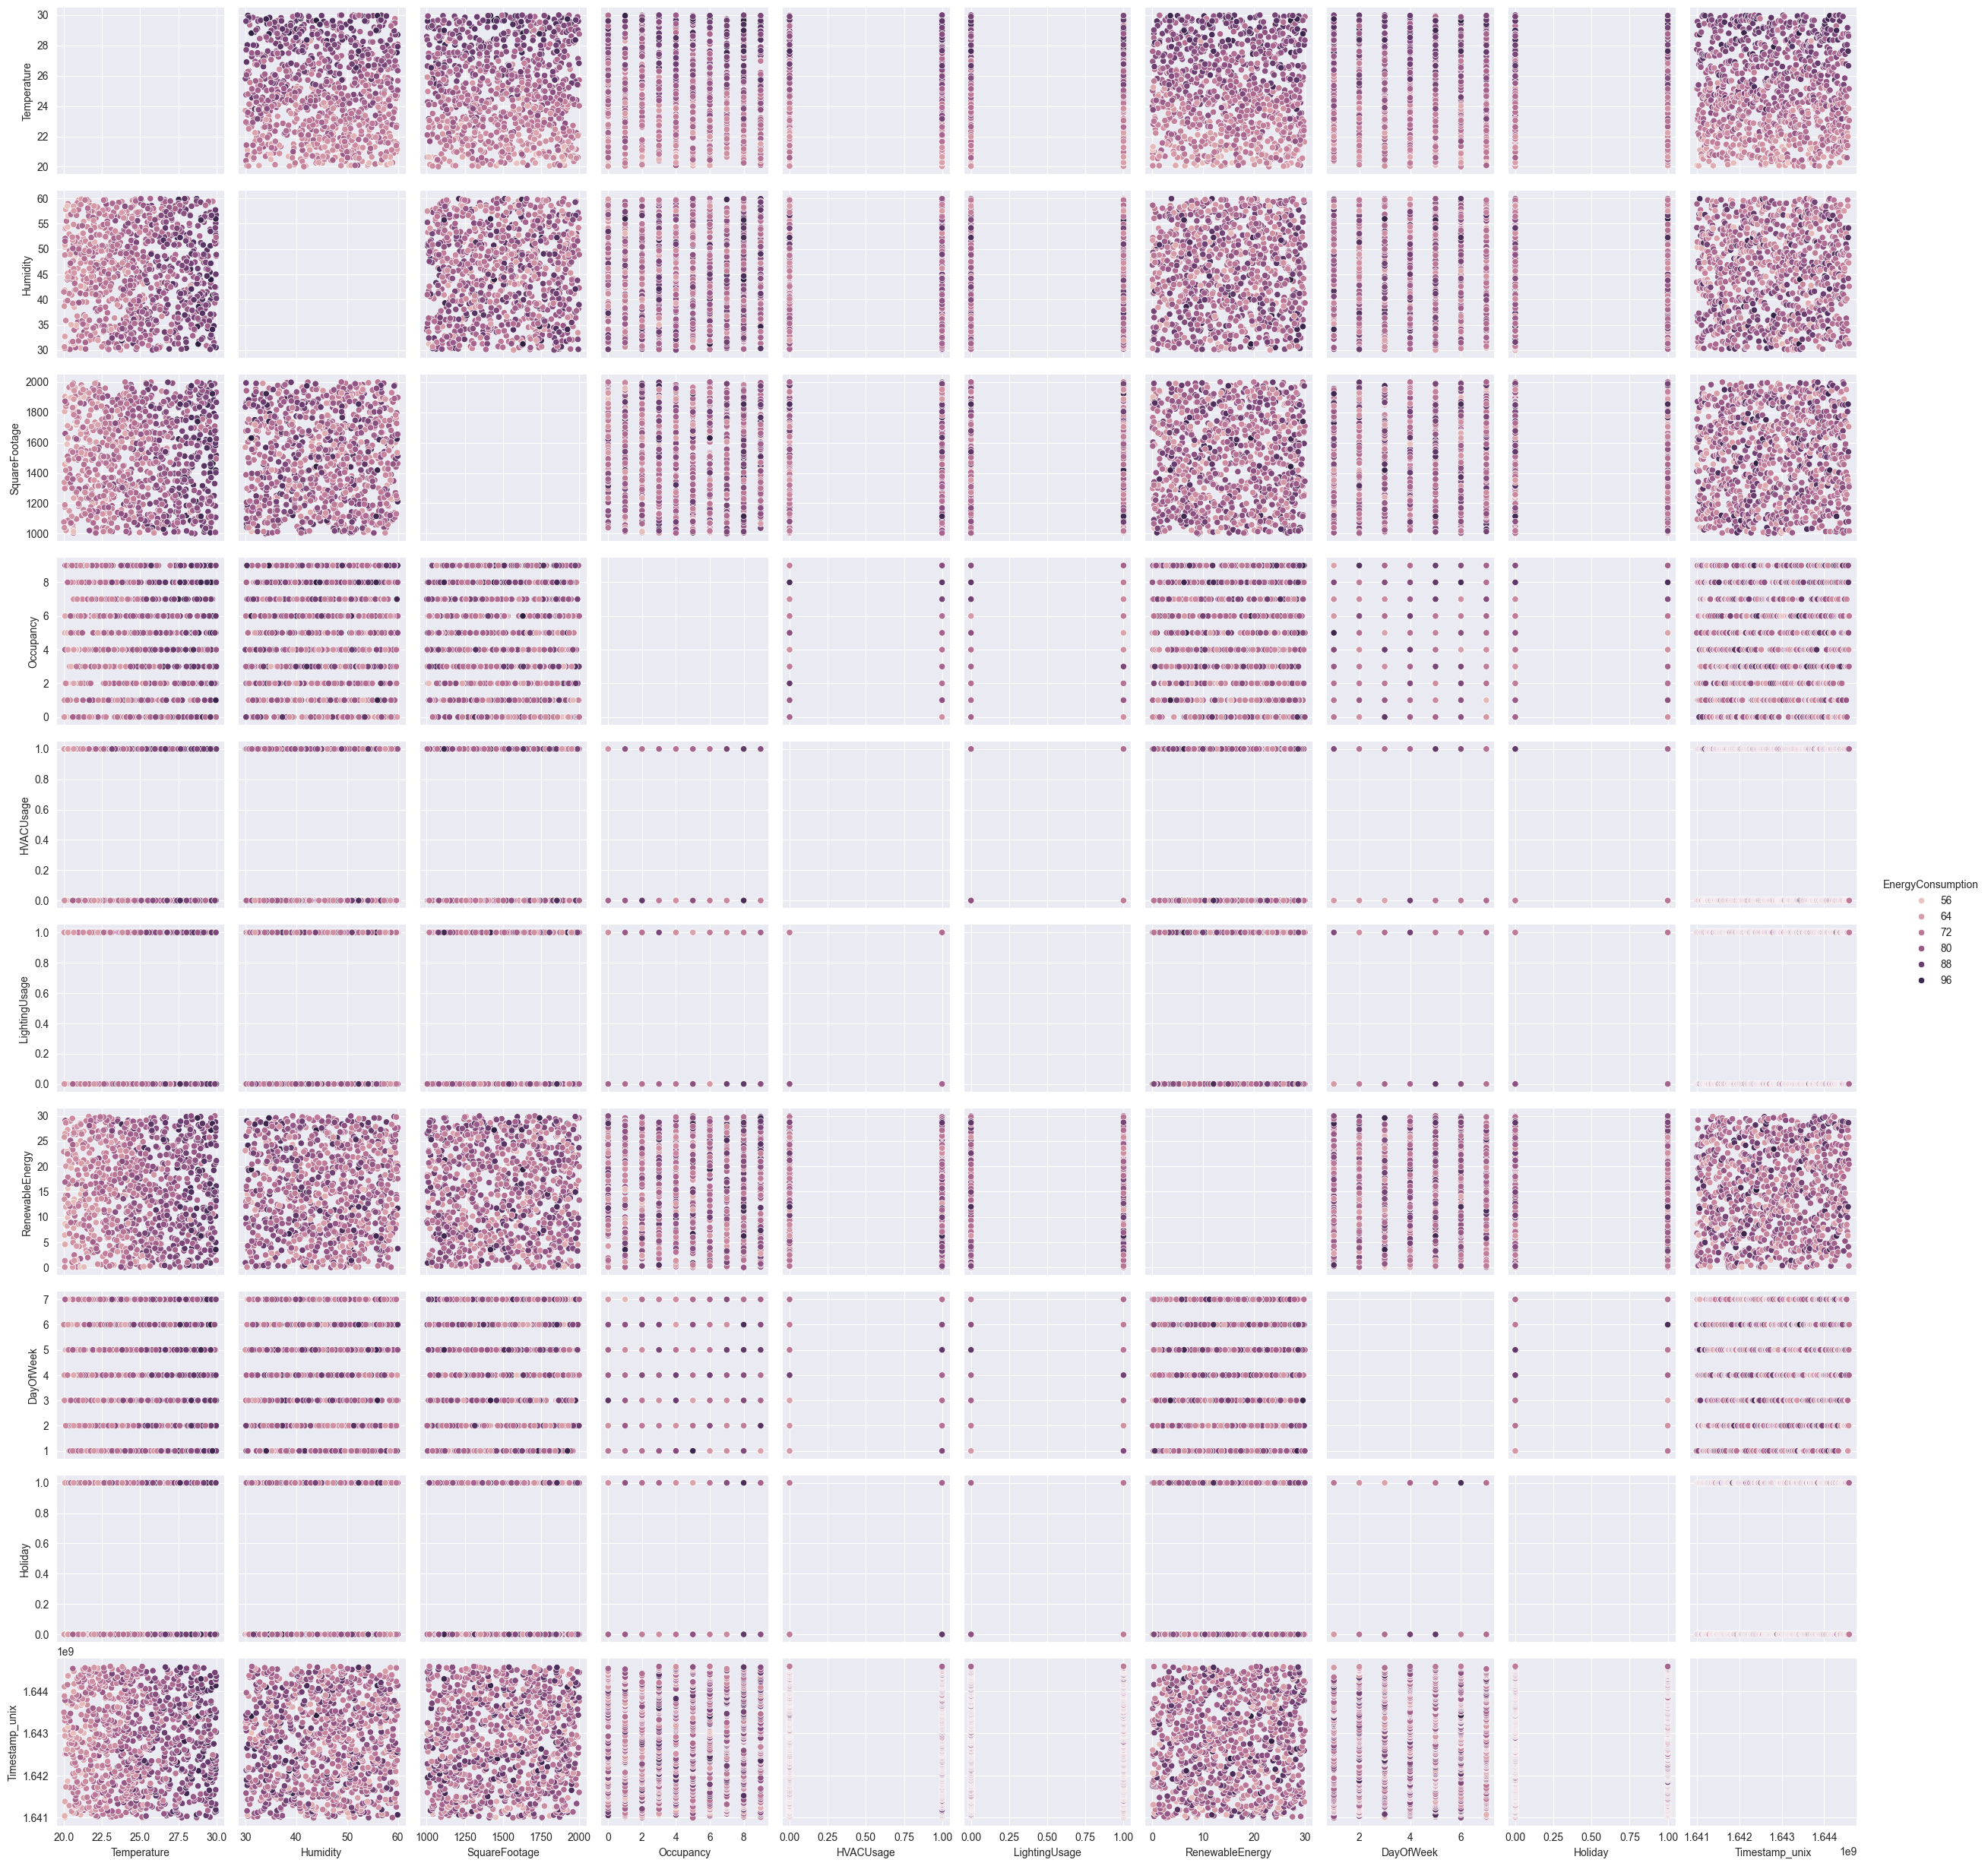

In [17]:
sns.pairplot(df, hue='EnergyConsumption')

Data visualisation and encoding is important for representation of data and preparation for our prediction models.  

After cleaning and encoding our data we can start implementing couple regression models. After we do that we will check their efficiency in predicting values on our holdout set (we will set it to 10% of the whole dataframe).

# 3. Linear Regression Models


In [18]:
X = df.drop('EnergyConsumption',axis=1)
y = df['EnergyConsumption']

In [19]:
skb = SelectKBest(k=4,score_func=f_regression)
transX = skb.fit_transform(X,y)
srt_skb = skb.pvalues_.argsort()[::-1]
print(srt_skb)
skb.pvalues_

[2 7 9 8 6 5 1 3 4 0]


array([5.70222544e-146, 3.05498261e-003, 9.71553934e-001, 2.76301328e-009,
       2.42306979e-020, 3.10566753e-003, 1.02428573e-002, 7.39582072e-001,
       7.32207624e-002, 2.77040556e-001])

In [20]:
skb.feature_names_in_

array(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek',
       'Holiday', 'Timestamp_unix'], dtype=object)

In [21]:
X_SKB = df[['Temperature', 'HVACUsage', 'Occupancy', 'Humidity','LightingUsage']]
X_SKB

Temperature  HVACUsage  Occupancy   Humidity  LightingUsage
0      25.139433          1          5  43.431581              0
1      27.731651          1          1  54.225919              1
2      28.704277          0          2  58.907658              0
3      20.080469          0          1  50.371637              1
4      23.097359          1          9  51.401421              0
..           ...        ...        ...        ...            ...
995    28.619382          0          5  48.850160              0
996    23.836647          0          4  47.256435              1
997    23.005340          0          6  48.720501              1
998    25.138365          1          3  31.306459              0
999    23.051165          0          6  42.615421              1

[1000 rows x 5 columns]

SelectKBest p-values shows su that all of our features are significant, top five are selected in `X_SKB` above. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=72018)

In [23]:

Input1=[('polynomial', PolynomialFeatures(include_bias=False)),('ss',StandardScaler() ),('model',Lasso(tol = 0.2))]
pipe1 = Pipeline(Input1)

param_grid1 = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10,100,1000]
}
search1 = GridSearchCV(pipe1, param_grid1, n_jobs=2)
search1.fit(X_train, y_train)
best1=search1.best_estimator_
print(search1.best_params_)
best1

{'model__alpha': 0.1, 'polynomial__degree': 1}


Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=0.1, tol=0.2))])

In [24]:

Input2=[('polynomial', PolynomialFeatures(include_bias=False)),('ss',StandardScaler() ), ('model',Ridge())]
pipe2 = Pipeline(Input2)

param_grid2 = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10,100,1000]
}

search2 = GridSearchCV(pipe2, param_grid2, n_jobs=2)
search2.fit(X_train, y_train)
best2=search2.best_estimator_
print(search2.best_params_)
best2

{'model__alpha': 10, 'polynomial__degree': 1}


Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

In [25]:

Input3 = [('polynomial', PolynomialFeatures(include_bias=False)), ('ss', StandardScaler()), ('model',ElasticNet(tol=0.2))]
pipe3 = Pipeline(Input3)

param_grid3 = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10,100,1000],
    "model__l1_ratio":[0.0001,0.001,0.01,0.1,1,10,100,1000]
}

search3 = GridSearchCV(pipe3, param_grid3, n_jobs=2)
search3.fit(X_train, y_train)
best3=search3.best_estimator_
print(search3.best_params_)
best3

{'model__alpha': 0.1, 'model__l1_ratio': 1, 'polynomial__degree': 1}


Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()),
                ('model', ElasticNet(alpha=0.1, l1_ratio=1, tol=0.2))])

In [26]:
print('for the training set R^2 of the best estimators for Lasso, Ridge and ElasticNet (in that order) are:')
print(best1.score(X_train,y_train))
print(best2.score(X_train,y_train))
print(best3.score(X_train,y_train))

for the training set R^2 of the best estimators for Lasso, Ridge and ElasticNet (in that order) are:
0.6111921987614747
0.6124810926429878
0.6111921987614747


In [27]:
print('for the test set R^2 of the best estimators for Lasso, Ridge and ElasticNet (in that order) are:')
print(best1.score(X_test,y_test))
print(best2.score(X_test,y_test))
print(best3.score(X_test,y_test))

for the test set R^2 of the best estimators for Lasso, Ridge and ElasticNet (in that order) are:
0.6645368081717871
0.6686871143154163
0.6645368081717871


In [28]:
Input4 = [('ss', StandardScaler()), ('model',LinearRegression())]
pipe4 = Pipeline(Input4)

In [29]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('model', LinearRegression())])

In [30]:
pipe4.score(X_train, y_train)

0.6125550867319011

In [31]:
pipe4.score(X_test, y_test)

0.6700805211563543

In [32]:
print(mean_squared_error(best1.predict(X_train), y_train))

25.245331859788127


In [33]:
print(mean_squared_error(best2.predict(X_train), y_train))

25.161643843068298


In [34]:
print(mean_squared_error(best3.predict(X_train), y_train))

25.245331859788127


In [35]:
print(mean_squared_error(pipe4.predict(X_train), y_train))

25.15683939901052


All above outputs present R^2 score as well as MSE score for Lasso, Ridge, ElasticNet and Linear regression models. Maximum prediction score from all of the models is 0.67 for the test set of data and 0.61 when predicting on train set.

Those scores are low but there should be a model that predicts more accurately for this specific dataset. That model is not amongst these above because even after preforming grid search we could not find a good enough model.   

In above outputs we can also see the best estimators with their respective best hyperparameters picked from `param_grid` for each model (except `LinearRegression()` model).

# 4. Insights and key findings


The chosen dataset proves that linear regression is sometimes not enough to make the most accurate predictions. Although that is true, we can still see that our linear models have scored above 60% in predicting the values of the holdout set.

We also need to keep in mind that all features of the set are to some degree statistically significant to the target value outcomes. From above histogram we se strong correlations between features. 

Finally, this dataset is consisted of enough information and there is no missing or duplicated values that would hinder our possibilities to predict the target values. 

Our `MSE` and `R^2` scores are not that high but not so low, they are somewhere in the middle meaning that we didn't find the best model for this dataset, but we did not miss completely with our models as well.

# 5. Next Steps


Next step would be to find some other model or models that would suit better to this dataset. We would need to explore more models and tune them with their respective hyperparameters to find the best estimator using grid search.  

Generally speaking this project shows only what can be called a great introduction to some linear models.   

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
